In [24]:
# Tendo o df livre de outliers, vamos agora lidar com os NaN's.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import AnaliseExploratoria_functions
from AnaliseExploratoria_functions import histogram_and_stats

current_path = os.getcwd()
csv_path = (current_path + '/Data/campeonatos_futebol_sem_outliers.csv')

In [25]:
df = pd.read_csv(csv_path)
df

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27652,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1
27653,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2
27654,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2
27655,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2


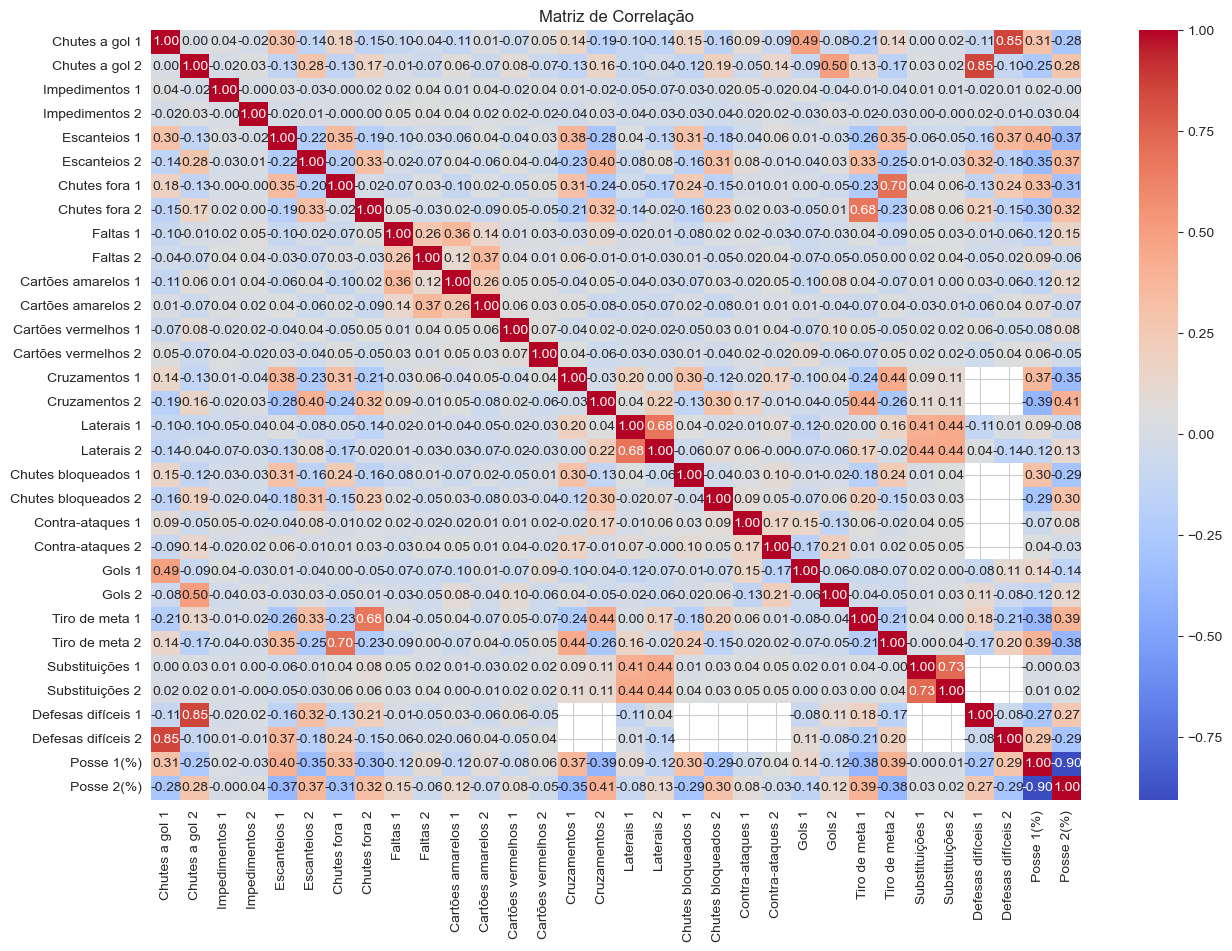

In [26]:
# O grupo combinou de remover as colunas Tiro-livre, Nomes e Tratamentos.
df.drop(columns=['Tiros-livres 1','Tiros-livres 2','Tratamentos 1','Tratamentos 2'],inplace=True)
correlacao = df.select_dtypes(include="number").corr()

# Visualização com heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [27]:
# Pela matriz, vemos que temos muitas colunas com NaN's, além de uma quantidade enorme de variáveis.
# Essa quantidade muito grande de variáveis (grande dimensionalidade) pode tornar os dados ainda mais
# escassos. Além de ocasionar uma redundância nas variáveis. Portanto, vamos primeiro tentar uma abordagem
# de diminuir a dimensionalidade (variáveis).

In [28]:
# Algumas ideias: pegar essas variáveis e transformar em índices. Por exemplo: chute a gol, chute bloqueado, gols e tiro de meta dão um indicador ofensivo.
# indicador defensivo: defesas difíceis e impedimentos podem indicar a força defensiva de cada time.
# indicador de jogadas com bola parada: agrupar laterais, escanteios, cruzamentos e tiros-livres
# indicador de intensidade: posse de bola, position, faltas, cartões amarelos e substituições.

In [29]:
df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2',
       'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Substituições 1',
       'Substituições 2', 'Defesas difíceis 1', 'Defesas difíceis 2',
       'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2', 'Position 1',
       'Position 2'],
      dtype='object')


Coluna: Posse 1(%)
Skewness: -0.304
Kurtosis (excesso): 1.184


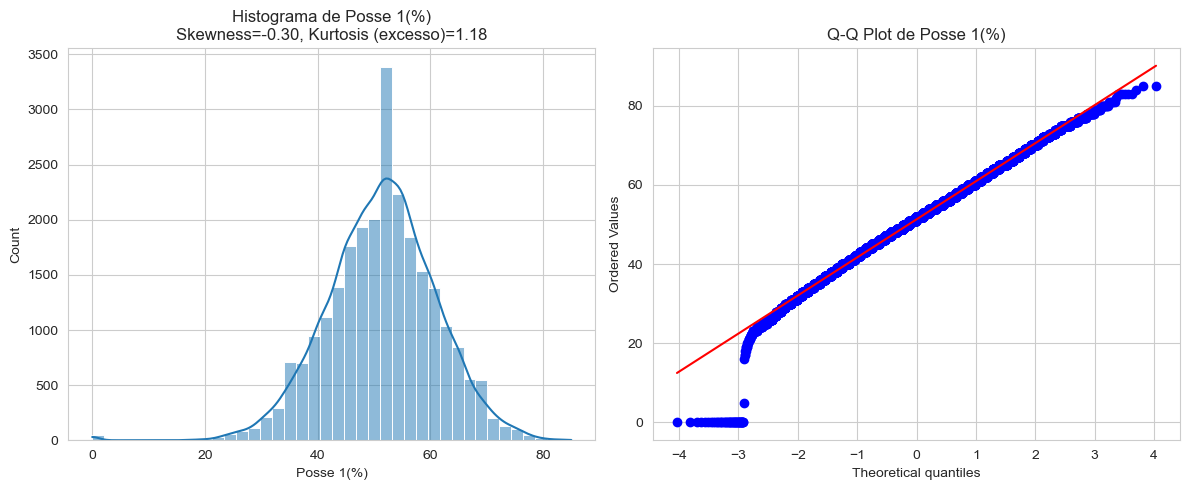


Coluna: Posse 2(%)
Skewness: -0.135
Kurtosis (excesso): 0.947


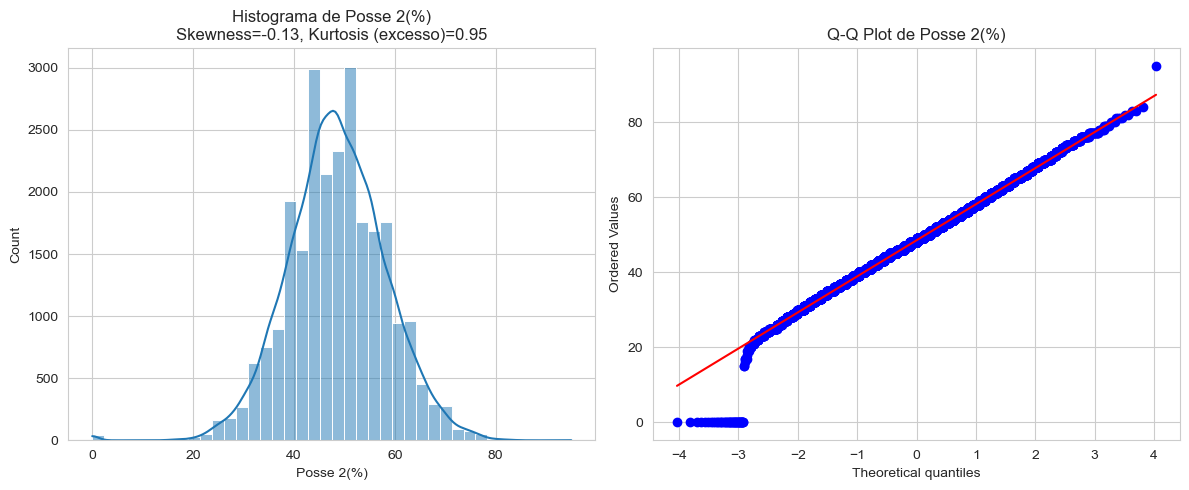

In [30]:
# Antes disso, vamos fazer uma imputação simples por mediana/média nas colunas que possuem poucos NaN's.
# Para isso, vamos avaliar a normalidade da distribuição de algumas variáveis. 

# TODO explicar como ler um gráfico Q-Q


from scipy.stats import probplot
colunas_avaliar = ['Posse 1(%)', 'Posse 2(%)']

for col in colunas_avaliar:
    # Remove os valores NaN para o cálculo das métricas e dos gráficos
    dados = df[col].dropna()

    # Cálculo da skewness e kurtosis
    skewness = dados.skew()
    kurtosis = dados.kurt()  # Lembre que pandas retorna o valor de "excesso de kurtosis" (kurtosis - 3)

    print(f"\nColuna: {col}")
    print(f"Skewness: {skewness:.3f}")
    print(f"Kurtosis (excesso): {kurtosis:.3f}")

    # Interpretação:
    # Skewness:
    #   - Se ~0, a distribuição é simétrica.
    #   - Se positivo, a cauda direita é mais longa, indicando assimetria à direita.
    #   - Se negativo, a cauda esquerda é mais longa, indicando assimetria à esquerda.
    #
    # Kurtosis:
    #   - Para uma distribuição normal, o excesso de kurtosis é 0 (pois a kurtosis normal é 3).
    #   - Valores positivos indicam caudas mais pesadas (mais outliers) que uma normal.
    #   - Valores negativos indicam caudas mais leves que uma normal.

    # Geração dos gráficos
    plt.figure(figsize=(12, 5))

    # Histograma com KDE
    plt.subplot(1, 2, 1)
    sns.histplot(dados, kde=True,bins=40)
    plt.title(f'Histograma de {col}\nSkewness={skewness:.2f}, Kurtosis (excesso)={kurtosis:.2f}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(dados, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')

    plt.tight_layout()
    plt.show()



In [31]:
# Skewness indica a concentração de valores nas caudas. Observamos que em ambos os casos, há valores concentrados na cauda direita 
# (skewness negativo).
# Kurtosis mede a tendência de se ter valores extremos. Isso é esperado, já que é perfeitamente possível a posse de bola ser altamente concentrada para um time numa partida. Portanto, o adequado seria fazer uma imputação por mediana, já que é menos afetada por valores extremos.

# NO ENTANTO, pelos gráficos, vemos que mesmo removendo outliers, temos times com posse de bola em 0%. Isso é impossível, e devemos corrigir.
linhas_incorretas = df[(df['Posse 1(%)'] == 0) | (df['Posse 2(%)'] == 0)]
print("Linhas com posse de bola igual a 0:\n")
df = df[(df['Posse 1(%)'] != 0) & (df['Posse 2(%)'] != 0)]

# e vamos repetir o teste.

Linhas com posse de bola igual a 0:




Coluna: Posse 1(%)
Skewness: -0.071
Kurtosis (excesso): 0.070


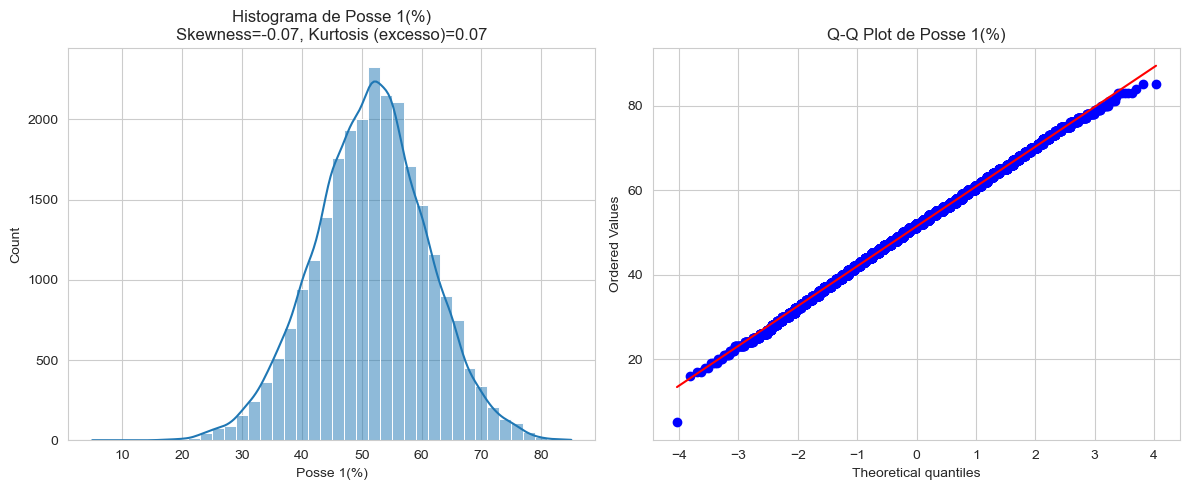


Coluna: Posse 2(%)
Skewness: 0.070
Kurtosis (excesso): 0.070


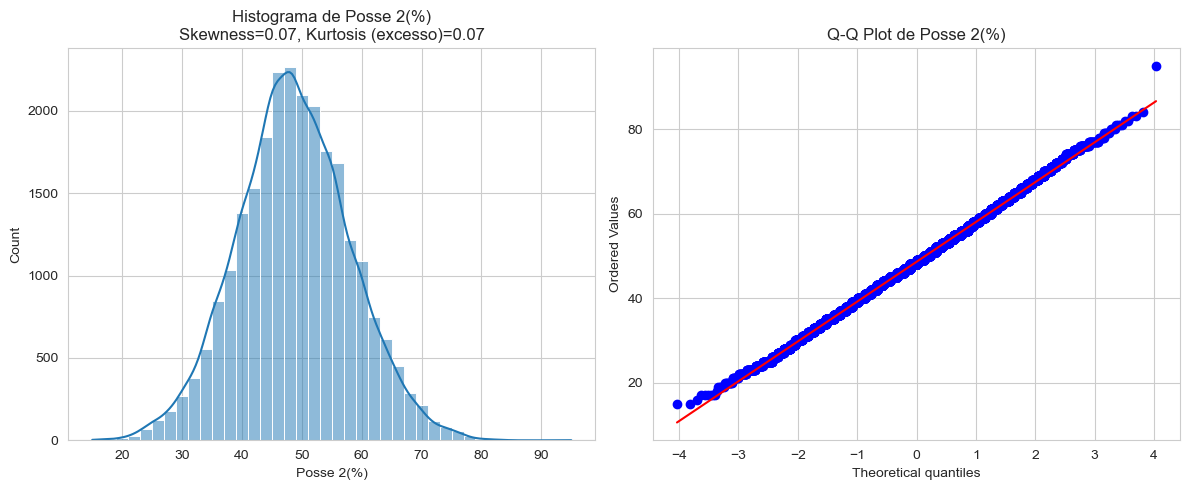

In [32]:

from scipy.stats import probplot
colunas_avaliar = ['Posse 1(%)', 'Posse 2(%)']

for col in colunas_avaliar:
    # Remove os valores NaN para o cálculo das métricas e dos gráficos
    dados = df[col].dropna()

    # Cálculo da skewness e kurtosis
    skewness = dados.skew()
    kurtosis = dados.kurt()  # Lembre que pandas retorna o valor de "excesso de kurtosis" (kurtosis - 3)

    print(f"\nColuna: {col}")
    print(f"Skewness: {skewness:.3f}")
    print(f"Kurtosis (excesso): {kurtosis:.3f}")

    # Interpretação:
    # Skewness:
    #   - Se ~0, a distribuição é simétrica.
    #   - Se positivo, a cauda direita é mais longa, indicando assimetria à direita.
    #   - Se negativo, a cauda esquerda é mais longa, indicando assimetria à esquerda.
    #
    # Kurtosis:
    #   - Para uma distribuição normal, o excesso de kurtosis é 0 (pois a kurtosis normal é 3).
    #   - Valores positivos indicam caudas mais pesadas (mais outliers) que uma normal.
    #   - Valores negativos indicam caudas mais leves que uma normal.

    # Geração dos gráficos
    plt.figure(figsize=(12, 5))

    # Histograma com KDE
    plt.subplot(1, 2, 1)
    sns.histplot(dados, kde=True,bins=40)
    plt.title(f'Histograma de {col}\nSkewness={skewness:.2f}, Kurtosis (excesso)={kurtosis:.2f}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(dados, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')

    plt.tight_layout()
    plt.show()
